<a href="https://colab.research.google.com/github/DebadityaShome/Deep-learning-practice/blob/main/Keras/ANN_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preparation and Processing**

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

## Creating example data for the scenario:


*   An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial
*   The trial had 2100 participants. Half were under 65 years old, and half were 65 years or older.
*   Around 95% of patients who were 65 years or older experienced side effects.
*   Around 95% of patients under 65 experienced no side effects.



In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who didn't experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who didn't experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples[:5]:
    print(i)

24
89
56
67
33


In [5]:
for i in train_labels[:5]:
    print(i)

1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPUs available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num of GPUs available:  1


In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2754 - accuracy: 0.9386 - val_loss: 0.2078 - val_accuracy: 0.9571
Epoch 2/30
189/189 - 0s - loss: 0.2741 - accuracy: 0.9323 - val_loss: 0.2075 - val_accuracy: 0.9667
Epoch 3/30
189/189 - 0s - loss: 0.2729 - accuracy: 0.9413 - val_loss: 0.2056 - val_accuracy: 0.9667
Epoch 4/30
189/189 - 0s - loss: 0.2718 - accuracy: 0.9418 - val_loss: 0.2040 - val_accuracy: 0.9667
Epoch 5/30
189/189 - 0s - loss: 0.2711 - accuracy: 0.9413 - val_loss: 0.2021 - val_accuracy: 0.9667
Epoch 6/30
189/189 - 0s - loss: 0.2701 - accuracy: 0.9418 - val_loss: 0.2008 - val_accuracy: 0.9667
Epoch 7/30
189/189 - 0s - loss: 0.2694 - accuracy: 0.9418 - val_loss: 0.1999 - val_accuracy: 0.9667
Epoch 8/30
189/189 - 0s - loss: 0.2687 - accuracy: 0.9418 - val_loss: 0.1984 - val_accuracy: 0.9667
Epoch 9/30
189/189 - 0s - loss: 0.2681 - accuracy: 0.9418 - val_loss: 0.1970 - val_accuracy: 0.9667
Epoch 10/30
189/189 - 0s - loss: 0.2676 - accuracy: 0.9434 - val_loss: 0.1965 - val_accuracy: 0.9667

### Creating test data

In [18]:
test_labels = []
test_samples = []

In [19]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who didn't experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who didn't experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [20]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [21]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [27]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [29]:
for i in predictions[:5]:
    print(i)  ## Probability of not experiencing side-effect, Probability of experiencing side-effect

[0.2907308 0.7092692]
[0.19591035 0.8040896 ]
[0.9573946  0.04260545]
[0.0356436  0.96435636]
[0.57981193 0.420188  ]


In [30]:
rounded_predictions = np.argmax(predictions, axis=1)

In [31]:
for i in rounded_predictions[:5]:
    print(i)  ## 0 -> No side effect, 1 -> Side effect

1
1
0
1
0


### **Confusion matrix**

In [32]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [33]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [36]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[198  12]
 [  9 201]]


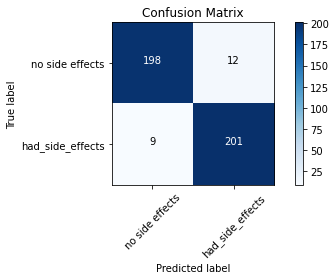

In [37]:
cm_plot_labels = ['no side effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Saving and loading the model


### **1. model.save()**

This save function saves in h5 format the following:

* Architecture
* Weights
* Training config (loss, optimizer)
* State of the optimizer, allowing to resume training exactly where you left off.

In [38]:
## Checks if file is there already
## If not, the model is saved to disk
import os
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [39]:
## Loading the model
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [41]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [42]:
new_model.get_weights()

[array([[-0.07050419, -0.0042389 , -0.39922562, -0.40517217,  0.3237866 ,
          0.6556205 , -0.13343418, -0.12454516,  0.510777  , -0.3465883 ,
          0.4403035 , -0.22554025, -0.5910816 , -0.56005716, -0.14129913,
          0.7582243 ]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        , -0.12907149,
        -0.07262778,  0.        ,  0.        , -0.14786878,  0.        ,
        -0.13719927,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.17667487], dtype=float32),
 array([[ 2.61015445e-01,  2.79049903e-01,  2.67762631e-01,
         -2.29403675e-02, -2.72208869e-01, -1.69315189e-01,
         -2.05040291e-01, -2.52682865e-02, -3.08850408e-02,
          1.88576549e-01, -2.02680066e-01,  2.90476412e-01,
         -2.44962037e-01,  1.29767269e-01,  3.21436554e-01,
         -3.08068603e-01,  3.56512666e-02,  2.08084613e-01,
          1.91516906e-01,  1.08353466e-01, -3.05000961e-01,
         -2.15860814e-01,  2.31220752e-01, -3.04524213e-01,
 

In [43]:
new_model.optimizer

### **2. model.to_json()**

If you only need to save the architecture of the model and nothing else, then use this function

In [44]:
# save as JSON
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [45]:
# Model reconstruction from JSON
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string) ## Only architecture without weights / optimizers

In [47]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### **2. model.save_weights()**

If you only need to save the weights of the model and nothing else, then use this function

In [49]:
## Checks if file is there already
## If not, the model is saved to disk
import os
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [50]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [51]:
model2.load_weights('models/my_model_weights.h5')

In [52]:
model2.get_weights()

[array([[-0.07050419, -0.0042389 , -0.39922562, -0.40517217,  0.3237866 ,
          0.6556205 , -0.13343418, -0.12454516,  0.510777  , -0.3465883 ,
          0.4403035 , -0.22554025, -0.5910816 , -0.56005716, -0.14129913,
          0.7582243 ]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        , -0.12907149,
        -0.07262778,  0.        ,  0.        , -0.14786878,  0.        ,
        -0.13719927,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.17667487], dtype=float32),
 array([[ 2.61015445e-01,  2.79049903e-01,  2.67762631e-01,
         -2.29403675e-02, -2.72208869e-01, -1.69315189e-01,
         -2.05040291e-01, -2.52682865e-02, -3.08850408e-02,
          1.88576549e-01, -2.02680066e-01,  2.90476412e-01,
         -2.44962037e-01,  1.29767269e-01,  3.21436554e-01,
         -3.08068603e-01,  3.56512666e-02,  2.08084613e-01,
          1.91516906e-01,  1.08353466e-01, -3.05000961e-01,
         -2.15860814e-01,  2.31220752e-01, -3.04524213e-01,
 